In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
%matplotlib inline  
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import os
os.chdir("C:/Users/Dell/Downloads/Data Set (Song Hotness) - extended")

In [3]:
df_train=pd.read_csv("train.csv",encoding = 'unicode_escape')
df_test= pd.read_csv("test.csv",encoding = 'unicode_escape')
df_artist = pd.read_csv("artists.csv",encoding = 'unicode_escape')
print(df_train.shape)
print(df_test.shape)
print(df_artist.shape)

(56220, 18)
(27625, 17)
(36088, 5)


In [4]:
df_train.head(5)

,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss
0,SONG_510448,ARTIST_2029,Pressure (Explicit LP Version),2001,22050,202.39628,0.200,0,0.873,-3.609,1,1.0,193.544,111.195,a6220f6edb54938cd4f1a44f7ff48459,4,1.00,0.681186
1,SONG_68913,ARTIST_1323,Tear Out My Eyes (Album Version),2002,22050,103.78404,2.328,2,1,-3.949,1,1.0,95.306,185.117,94aabc3aee57cb4b7878e5c4458c5623,1,0.00,0.734794
2,SONG_158502,ARTIST_5289,Wherever I May Roam,1991,22050,421.53751,5.306,3,0.909,-4.016,1,1.0,415.945,136.193,7d06ef7368b3b2133cee7b01d2a0fd8b,4,0.00,0.586969
3,SONG_60605,ARTIST_10938,Everything Goes Around,2003,22050,186.06975,0.270,0,0.576,-4.741,0,1.0,179.026,165.804,de533ef1cdf1199ca5acce91c87a30cd,4,0.00,0.605378
4,SONG_71870,ARTIST_5135,Phatty Boom Batty (Album Version),1999,22050,212.45342,0.000,0,0.955,-4.926,1,1.0,204.922,143.209,62f2b97fa06c71078cbe3b15a6f36ad2,4,0.09,0.212045


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56220 entries, 0 to 56219
Data columns (total 18 columns):
song_id                      56220 non-null object
artist_id                    56220 non-null object
title                        56220 non-null object
year                         56220 non-null int64
analysis_sample_rate         56220 non-null int64
duration                     56162 non-null object
end_of_fade_in               56220 non-null float64
key                          56220 non-null int64
key_confidence               56162 non-null object
loudness                     56220 non-null float64
mode                         56220 non-null int64
mode_confidence              56220 non-null float64
start_of_fade_out            56220 non-null float64
tempo                        56220 non-null float64
audio_md5                    56220 non-null object
time_signature               56220 non-null int64
time_signature_confidence    56220 non-null float64
song_hotttnesss        

In [6]:
#df_train.describe()

In [7]:
#df['duration'][0]

In [8]:
df_train.columns

Index(['song_id', 'artist_id', 'title', 'year', 'analysis_sample_rate',
       'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'audio_md5',
       'time_signature', 'time_signature_confidence', 'song_hotttnesss'],
      dtype='object')

In [9]:
df_train.isnull().sum(axis=0)

song_id                       0
artist_id                     0
title                         0
year                          0
analysis_sample_rate          0
duration                     58
end_of_fade_in                0
key                           0
key_confidence               58
loudness                      0
mode                          0
mode_confidence               0
start_of_fade_out             0
tempo                         0
audio_md5                     0
time_signature                0
time_signature_confidence     0
song_hotttnesss               0
dtype: int64

In [10]:
# concat test and train
total_data= pd.concat([df_train, df_test], axis=0, ignore_index= True)
print(total_data.shape)
total_data.head()

(83845, 18)


,analysis_sample_rate,artist_id,audio_md5,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,song_id,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year
0,22050,ARTIST_2029,a6220f6edb54938cd4f1a44f7ff48459,202.39628,0.200,0,0.873,-3.609,1,1.0,0.681186,SONG_510448,193.544,111.195,4,1.00,Pressure (Explicit LP Version),2001
1,22050,ARTIST_1323,94aabc3aee57cb4b7878e5c4458c5623,103.78404,2.328,2,1,-3.949,1,1.0,0.734794,SONG_68913,95.306,185.117,1,0.00,Tear Out My Eyes (Album Version),2002
2,22050,ARTIST_5289,7d06ef7368b3b2133cee7b01d2a0fd8b,421.53751,5.306,3,0.909,-4.016,1,1.0,0.586969,SONG_158502,415.945,136.193,4,0.00,Wherever I May Roam,1991
3,22050,ARTIST_10938,de533ef1cdf1199ca5acce91c87a30cd,186.06975,0.270,0,0.576,-4.741,0,1.0,0.605378,SONG_60605,179.026,165.804,4,0.00,Everything Goes Around,2003
4,22050,ARTIST_5135,62f2b97fa06c71078cbe3b15a6f36ad2,212.45342,0.000,0,0.955,-4.926,1,1.0,0.212045,SONG_71870,204.922,143.209,4,0.09,Phatty Boom Batty (Album Version),1999


In [11]:
# merging total data with artists

df = pd.merge(total_data,df_artist,how='left',on = 'artist_id')
df.shape
df.head()

,analysis_sample_rate,artist_id,audio_md5,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,...,start_of_fade_out,tempo,time_signature,time_signature_confidence,title,year,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
0,22050,ARTIST_2029,a6220f6edb54938cd4f1a44f7ff48459,202.39628,0.200,0,0.873,-3.609,1,1.0,...,193.544,111.195,4,1.00,Pressure (Explicit LP Version),2001,0.863397,0.551769,42.10125,-72.58929
1,22050,ARTIST_1323,94aabc3aee57cb4b7878e5c4458c5623,103.78404,2.328,2,1,-3.949,1,1.0,...,95.306,185.117,1,0.00,Tear Out My Eyes (Album Version),2002,0.681509,0.464970,42.31256,-71.08868
2,22050,ARTIST_5289,7d06ef7368b3b2133cee7b01d2a0fd8b,421.53751,5.306,3,0.909,-4.016,1,1.0,...,415.945,136.193,4,0.00,Wherever I May Roam,1991,0.852136,0.780334,0.00000,0.00000
3,22050,ARTIST_10938,de533ef1cdf1199ca5acce91c87a30cd,186.06975,0.270,0,0.576,-4.741,0,1.0,...,179.026,165.804,4,0.00,Everything Goes Around,2003,0.673061,0.436820,53.40977,-2.97848
4,22050,ARTIST_5135,62f2b97fa06c71078cbe3b15a6f36ad2,212.45342,0.000,0,0.955,-4.926,1,1.0,...,204.922,143.209,4,0.09,Phatty Boom Batty (Album Version),1999,0.565656,0.414670,40.14323,-74.72671


In [12]:
df.isnull().sum(axis=0)

analysis_sample_rate             0
artist_id                        0
audio_md5                        0
duration                        58
end_of_fade_in                   0
key                              0
key_confidence                  58
loudness                         0
mode                             0
mode_confidence                  0
song_hotttnesss              27625
song_id                          0
start_of_fade_out                0
tempo                            0
time_signature                   0
time_signature_confidence        0
title                            0
year                             0
artist_familiarity               0
artist_hotttnesss                0
artist_latitude                  0
artist_longitude                 0
dtype: int64

In [13]:
## Droping rows  year with 0 and 1
#df = df.drop(df[df.year == 0].index)
#df = df.drop(df[df.year == 1].index)

In [14]:
train_data= df[df.song_hotttnesss.notnull()]
print(train_data.shape)

(56220, 22)


In [15]:
test_data= df[df.song_hotttnesss.isnull()]
print(test_data.shape)

(27625, 22)


In [16]:
test_data.columns

Index(['analysis_sample_rate', 'artist_id', 'audio_md5', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'song_hotttnesss', 'song_id', 'start_of_fade_out',
       'tempo', 'time_signature', 'time_signature_confidence', 'title', 'year',
       'artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude'],
      dtype='object')

In [17]:
test_data.isnull().sum(axis=0)

analysis_sample_rate             0
artist_id                        0
audio_md5                        0
duration                         0
end_of_fade_in                   0
key                              0
key_confidence                   0
loudness                         0
mode                             0
mode_confidence                  0
song_hotttnesss              27625
song_id                          0
start_of_fade_out                0
tempo                            0
time_signature                   0
time_signature_confidence        0
title                            0
year                             0
artist_familiarity               0
artist_hotttnesss                0
artist_latitude                  0
artist_longitude                 0
dtype: int64

In [18]:
train_data.columns

Index(['analysis_sample_rate', 'artist_id', 'audio_md5', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'song_hotttnesss', 'song_id', 'start_of_fade_out',
       'tempo', 'time_signature', 'time_signature_confidence', 'title', 'year',
       'artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude'],
      dtype='object')

In [19]:
test_data.columns

Index(['analysis_sample_rate', 'artist_id', 'audio_md5', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'song_hotttnesss', 'song_id', 'start_of_fade_out',
       'tempo', 'time_signature', 'time_signature_confidence', 'title', 'year',
       'artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude'],
      dtype='object')

In [20]:
train_data.describe()

,analysis_sample_rate,end_of_fade_in,key,loudness,mode,mode_confidence,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
count,56220.0,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000,56220.000000
mean,22050.0,0.898636,5.242796,-9.752679,0.675578,0.483465,0.512712,236.434548,124.699724,3.955461,0.508161,1482.019210,0.700703,0.492049,16.081477,-22.877545
std,0.0,3.662336,3.575497,5.051520,0.468163,0.191851,0.164448,108.988070,35.353868,1.860560,0.367591,874.162789,0.098646,0.091873,21.929739,42.525271
min,22050.0,0.000000,0.000000,-51.416000,0.000000,0.000000,0.190415,0.809000,0.000000,0.000000,0.000000,0.000000,0.171667,0.000000,-37.817530,-123.207900
25%,22050.0,0.000000,2.000000,-12.232000,0.000000,0.367000,0.386477,177.656000,98.060000,4.000000,0.127000,1.000000,0.632718,0.431376,0.000000,-71.088680
50%,22050.0,0.200000,5.000000,-8.602500,1.000000,0.494000,0.519449,223.841500,121.063500,4.000000,0.543000,1996.000000,0.696001,0.482100,0.000000,0.000000
75%,22050.0,0.438000,9.000000,-6.131000,1.000000,0.614000,0.633718,275.732500,146.315750,4.000000,0.850000,2004.000000,0.771686,0.539207,39.102950,0.000000
max,22050.0,602.175000,11.000000,0.744000,1.000000,1.000000,1.000000,2943.808000,262.412000,10.000000,1.000000,2010.000000,0.947328,1.082503,69.651020,145.469000


In [21]:
#CLEANING
#train_data.dropna(axis=1,inplace =True)
#isnull().sum(axis=0) 
### dropping missing values as it is few in no
#train_data.dropna(axis=0,inplace =True)
#train_data.isnull().sum(axis=0)
train_data.shape

(56220, 22)

In [22]:
corr = train_data.corr()
corr.style.background_gradient()

,analysis_sample_rate,end_of_fade_in,key,loudness,mode,mode_confidence,song_hotttnesss,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude
analysis_sample_rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
end_of_fade_in,nan,1,4.30077e-05,-0.0738693,-0.00164903,-0.00346874,0.00229934,0.0743863,-0.0350173,-0.0137412,-3.96628e-05,0.00330037,0.00161084,0.00167134,0.00693936,0.00711276
key,nan,4.30077e-05,1,0.0267471,-0.173546,-0.0343093,0.00212324,0.0175812,0.0160542,0.0235378,0.00445687,-0.000554093,0.0116092,0.00974019,0.000351449,0.00356699
loudness,nan,-0.0738693,0.0267471,1,-0.0057005,-0.0321816,0.169846,0.0253426,0.168667,0.0682373,0.0165343,0.0356607,0.203258,0.173387,-0.0602162,0.0732745
mode,nan,-0.00164903,-0.173546,-0.0057005,1,0.129291,-0.0270775,-0.0616262,-0.0130546,-0.0444228,-0.0354098,-0.0161734,-0.00666779,0.0030975,0.00131643,-0.031914
mode_confidence,nan,-0.00346874,-0.0343093,-0.0321816,0.129291,1,-0.0112424,0.00325777,-0.00594632,-0.183009,-0.0105043,-0.0633091,-0.0185512,0.0124446,-0.00162921,0.000232707
song_hotttnesss,nan,0.00229934,0.00212324,0.169846,-0.0270775,-0.0112424,1,-0.00326764,0.0521006,0.0173043,0.0232619,0.256297,0.399256,0.3447,-0.0182827,0.0607441
start_of_fade_out,nan,0.0743863,0.0175812,0.0253426,-0.0616262,0.00325777,-0.00326764,1,-0.0240066,0.0605641,0.117048,-0.0188496,0.00249072,0.00362769,0.00622356,0.0306725
tempo,nan,-0.0350173,0.0160542,0.168667,-0.0130546,-0.00594632,0.0521006,-0.0240066,1,0.0327032,-0.155577,0.0180725,0.0404587,0.0157316,-0.00117982,0.00246768
time_signature,nan,-0.0137412,0.0235378,0.0682373,-0.0444228,-0.183009,0.0173043,0.0605641,0.0327032,1,0.189305,0.0148532,0.0177101,0.0190192,-0.00561335,0.0104517


In [23]:
#VISUALIZATION

#PREPROSESSING

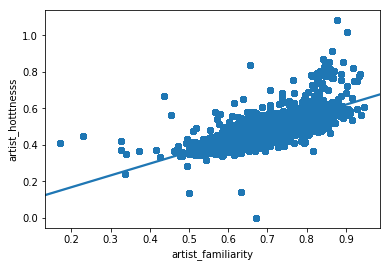

In [24]:
#df_train['loudness'].corr(df_train.song_hotttnesss)
sns.regplot(y='artist_hotttnesss',x='artist_familiarity',data=train_data,fit_reg=True)
# Artist_familarity is correlated with artist_hotness

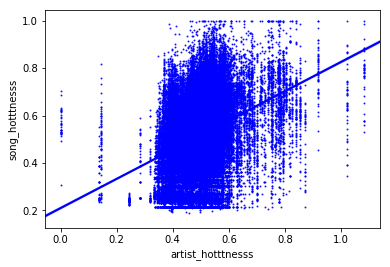

In [25]:
sns.regplot(x='artist_hotttnesss',y='song_hotttnesss',data=train_data,fit_reg=True,marker='o', color='blue', scatter_kws={'s':1})
#The hotness  of the artist has a correlation to the song_hotness value

In [26]:
#train_data['year'].value_counts()

In [27]:
#sns.regplot(y='artist_hotttnesss',x='year',data=train_data,fit_reg=True)


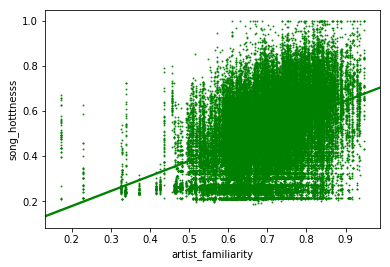

In [28]:
sns.regplot(x='artist_familiarity',y='song_hotttnesss',data=train_data,fit_reg=True,marker='o', color='green', scatter_kws={'s':1})
# The familiarity of the artist has a correlation to the song_hotness value
#greater the hotness value greater is the song hotness

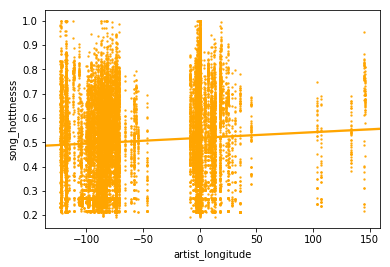

In [29]:
sns.regplot(x='artist_longitude',y='song_hotttnesss',data=train_data,fit_reg=True,marker='o', color='orange', scatter_kws={'s':2}) 
#we can see that the hits are centralized around these specific areas

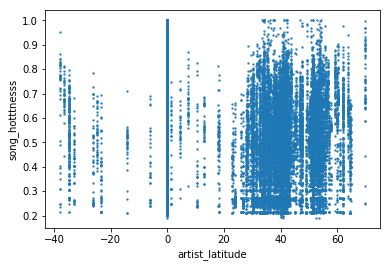

In [30]:
sns.regplot(y='song_hotttnesss',x='artist_latitude',data=train_data,fit_reg=False,scatter_kws={'s':2})
 #we can see that the hits are centralized around these specific areas

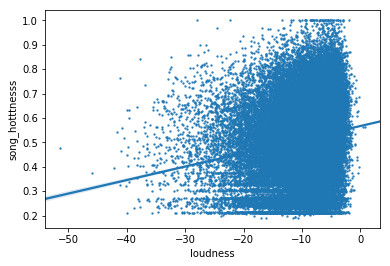

In [31]:
 sns.regplot(y='song_hotttnesss',x='loudness',data=train_data,fit_reg=True,scatter_kws={'s':2})


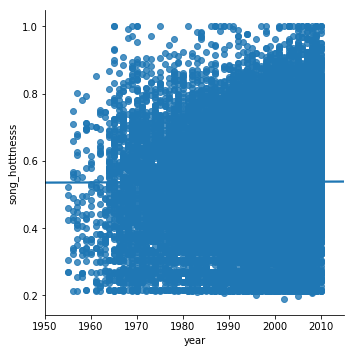

In [32]:
g=sns.lmplot(y='song_hotttnesss',x='year',sharex=False, sharey=False,data=train_data,fit_reg=True)
g.set(xlim=(1950, 2015))


In [33]:
train_data = train_data.drop(train_data[train_data.year == 0].index)
train_data = train_data.drop(train_data[train_data.year == 1].index)


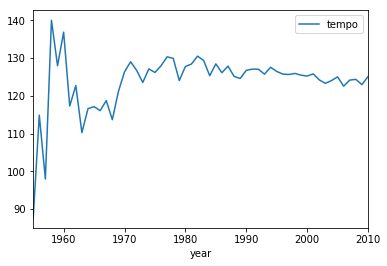

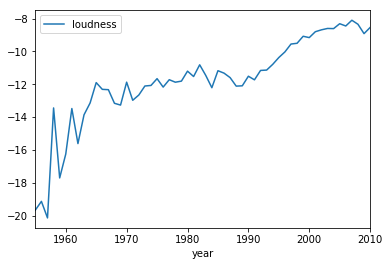

In [34]:
agg_df = train_data.groupby(train_data.year).mean().reset_index()
agg_df.plot(x='year',y='tempo')

#agg_df.plot(x='year',y='duration')


agg_df.plot(x='year',y='loudness')

In [35]:
train_data.columns

Index(['analysis_sample_rate', 'artist_id', 'audio_md5', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'song_hotttnesss', 'song_id', 'start_of_fade_out',
       'tempo', 'time_signature', 'time_signature_confidence', 'title', 'year',
       'artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude'],
      dtype='object')

Text(0,0.5,'Year')

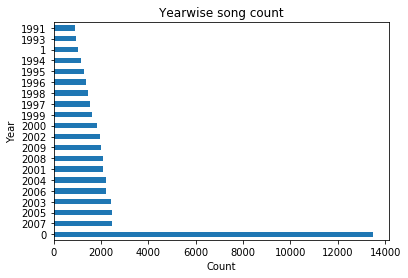

In [36]:
ax= df_train['year'].value_counts().nlargest(20).plot(kind = 'barh',title ='Yearwise song count') 
ax.set_xlabel("Count") 
ax.set_ylabel("Year")
#df_train['year'].value_counts().nlargest().plot(kind = 'barh',)

In [37]:
train_data.columns

Index(['analysis_sample_rate', 'artist_id', 'audio_md5', 'duration',
       'end_of_fade_in', 'key', 'key_confidence', 'loudness', 'mode',
       'mode_confidence', 'song_hotttnesss', 'song_id', 'start_of_fade_out',
       'tempo', 'time_signature', 'time_signature_confidence', 'title', 'year',
       'artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude'],
      dtype='object')

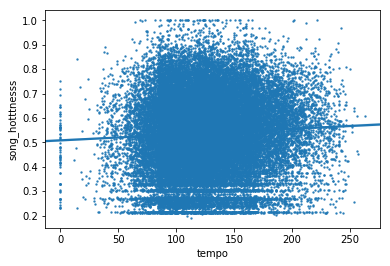

In [38]:
sns.regplot(y='song_hotttnesss',x='tempo',data=train_data,fit_reg=True,scatter_kws={'s':2})
#most of song_hotness is within the range of tempo(50-250)

In [39]:
# sns.regplot(y='song_hotttnesss',x='artist_latitude',data=train_data,fit_reg=True,)
# around 0, 30-60 latitude .....song hotness is high

(array([6.500e+01, 0.000e+00, 4.000e+00, 5.000e+00, 1.000e+01, 9.000e+00,
        4.100e+01, 7.300e+01, 1.060e+02, 9.900e+01, 1.380e+02, 2.260e+02,
        4.100e+02, 5.420e+02, 7.620e+02, 9.360e+02, 2.443e+03, 2.625e+03,
        2.406e+03, 2.397e+03, 2.277e+03, 2.125e+03, 2.713e+03, 2.620e+03,
        2.657e+03, 2.074e+03, 1.895e+03, 1.631e+03, 1.546e+03, 1.232e+03,
        1.483e+03, 1.199e+03, 9.320e+02, 6.210e+02, 6.100e+02, 5.750e+02,
        5.160e+02, 3.620e+02, 3.290e+02, 2.350e+02, 1.960e+02, 1.580e+02,
        1.300e+02, 9.800e+01, 8.500e+01, 6.100e+01, 3.700e+01, 8.000e+00,
        6.000e+00, 1.000e+00]),
 array([  0.     ,   5.24824,  10.49648,  15.74472,  20.99296,  26.2412 ,
         31.48944,  36.73768,  41.98592,  47.23416,  52.4824 ,  57.73064,
         62.97888,  68.22712,  73.47536,  78.7236 ,  83.97184,  89.22008,
         94.46832,  99.71656, 104.9648 , 110.21304, 115.46128, 120.70952,
        125.95776, 131.206  , 136.45424, 141.70248, 146.95072, 152.19896,
      

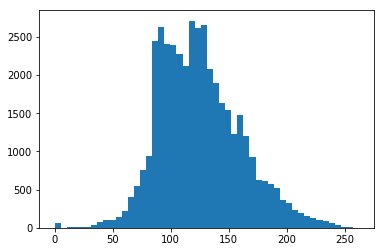

In [40]:
plt.hist(train_data['tempo'].dropna(), bins=50)
#We can see that for tempo there was a range that hot songs commonly used,
#and there were two peaks within this range at about 100 bpm and 135 bpm. 

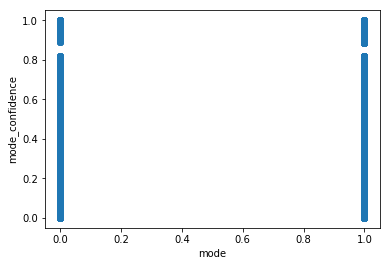

In [41]:
 sns.regplot(x='mode',y='mode_confidence',data=train_data,fit_reg=False)


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56220 entries, 0 to 56219
Data columns (total 18 columns):
song_id                      56220 non-null object
artist_id                    56220 non-null object
title                        56220 non-null object
year                         56220 non-null int64
analysis_sample_rate         56220 non-null int64
duration                     56162 non-null object
end_of_fade_in               56220 non-null float64
key                          56220 non-null int64
key_confidence               56162 non-null object
loudness                     56220 non-null float64
mode                         56220 non-null int64
mode_confidence              56220 non-null float64
start_of_fade_out            56220 non-null float64
tempo                        56220 non-null float64
audio_md5                    56220 non-null object
time_signature               56220 non-null int64
time_signature_confidence    56220 non-null float64
song_hotttnesss        

In [43]:
df1 = pd.concat([train_data, test_data], axis=0, ignore_index= True)
df1.shape

(69334, 22)

In [44]:
#Most Popular Songs
df1.sort_values(by=['song_hotttnesss','year'],ascending=False)[['title','song_hotttnesss','year']].head(10)

,title,song_hotttnesss,year
3289,Odessa,1.0,2010
18187,Howlin For You,1.0,2010
36752,Tighten Up,1.0,2010
1808,3,1.0,2009
28626,If It's Love,1.0,2009
28636,Halfway Gone,1.0,2009
37374,Naive,1.0,2009
15082,Use Somebody,1.0,2008
2344,Harder Better Faster Stronger,1.0,2007
16760,Thnks fr th Mmrs,1.0,2007


In [45]:
##feature engneering

In [46]:
df1['total_duration_full_volume'] = (df1['end_of_fade_in'] - df1['start_of_fade_out'])
#df1.head()
#total_duration_full_volume in seconds

In [47]:
############ IMPUTATION ##################

In [48]:
#DURATION
for i in range(df1['duration'].shape[0]):
    if df1['duration'][i] == 'y':
        df1['duration'][i] = np.nan

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69334 entries, 0 to 69333
Data columns (total 23 columns):
analysis_sample_rate          69334 non-null int64
artist_id                     69334 non-null object
audio_md5                     69334 non-null object
duration                      69019 non-null object
end_of_fade_in                69334 non-null float64
key                           69334 non-null int64
key_confidence                69289 non-null object
loudness                      69334 non-null float64
mode                          69334 non-null int64
mode_confidence               69334 non-null float64
song_hotttnesss               41709 non-null float64
song_id                       69334 non-null object
start_of_fade_out             69334 non-null float64
tempo                         69334 non-null float64
time_signature                69334 non-null int64
time_signature_confidence     69334 non-null float64
title                         69334 non-null object
year

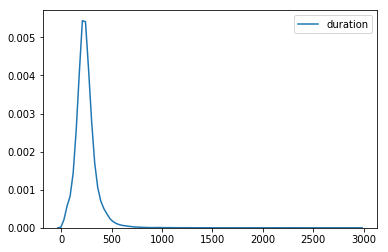

In [50]:
sns.kdeplot(data = df1['duration'].dropna())
#right skewed

In [51]:
df1['duration'] = df1['duration'].astype(float)


In [52]:
df1['duration'].corr(df1['start_of_fade_out'])


0.9964074137936256

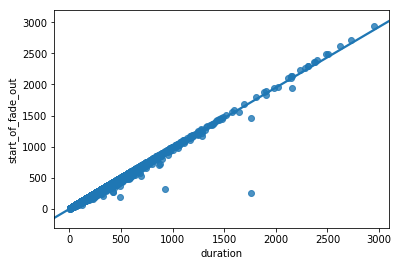

In [53]:
sns.regplot(y='start_of_fade_out',x='duration',data=df1,fit_reg=True)


In [54]:
#imputing duration
df1['duration'].fillna( df1['start_of_fade_out'],inplace= True)

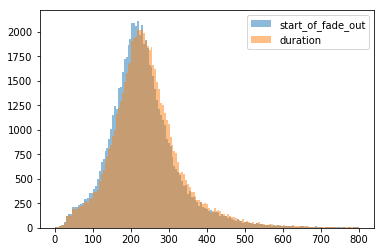

In [55]:
import random
import numpy
from matplotlib import pyplot

x = [df1['start_of_fade_out']]
y = [df1['duration']]

bins = numpy.linspace(0, 800, 160)

pyplot.hist(x,bins, alpha=0.5, label='start_of_fade_out')
pyplot.hist(y,bins, alpha=0.5, label='duration')
pyplot.legend(loc='upper right')
pyplot.show()

In [56]:
df1.isnull().sum(axis=0)

analysis_sample_rate              0
artist_id                         0
audio_md5                         0
duration                          0
end_of_fade_in                    0
key                               0
key_confidence                   45
loudness                          0
mode                              0
mode_confidence                   0
song_hotttnesss               27625
song_id                           0
start_of_fade_out                 0
tempo                             0
time_signature                    0
time_signature_confidence         0
title                             0
year                              0
artist_familiarity                0
artist_hotttnesss                 0
artist_latitude                   0
artist_longitude                  0
total_duration_full_volume        0
dtype: int64

In [57]:
#KEY_CONFIDENCE
df1['key_confidence'].value_counts()

0.0                   3656
1.0                    520
1                      512
z                      196
0.001                  136
                      ... 
0.9990000000000001       2
0.01                     1
0.005                    1
0.99                     1
0.963                    1
Name: key_confidence, Length: 1999, dtype: int64

In [58]:
for i in range(df1['key_confidence'].shape[0]):
    if df1['key_confidence'][i] == 'z':
        df1['key_confidence'][i] = np.nan

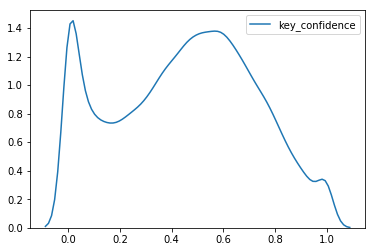

In [59]:
sns.kdeplot(data = df1['key_confidence'].dropna())


In [60]:
df1['key_confidence'].fillna(df1['key_confidence'].median(), inplace=True)


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69334 entries, 0 to 69333
Data columns (total 23 columns):
analysis_sample_rate          69334 non-null int64
artist_id                     69334 non-null object
audio_md5                     69334 non-null object
duration                      69334 non-null float64
end_of_fade_in                69334 non-null float64
key                           69334 non-null int64
key_confidence                69334 non-null object
loudness                      69334 non-null float64
mode                          69334 non-null int64
mode_confidence               69334 non-null float64
song_hotttnesss               41709 non-null float64
song_id                       69334 non-null object
start_of_fade_out             69334 non-null float64
tempo                         69334 non-null float64
time_signature                69334 non-null int64
time_signature_confidence     69334 non-null float64
title                         69334 non-null object
yea

In [62]:
## Dealing with text data(calculating sentiment score of title)

In [63]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df1['title']]

In [64]:
df1['sentiment_score_of_titles'] = sentiment_scores_tb

In [65]:
df1['sentiment_score_of_titles'].value_counts()

 0.000    53173
 0.500     2189
 0.136     1675
-0.200      637
 0.100      627
          ...  
-0.037        1
 0.004        1
 0.489        1
 0.508        1
 0.617        1
Name: sentiment_score_of_titles, Length: 419, dtype: int64

In [66]:
#df1.head()

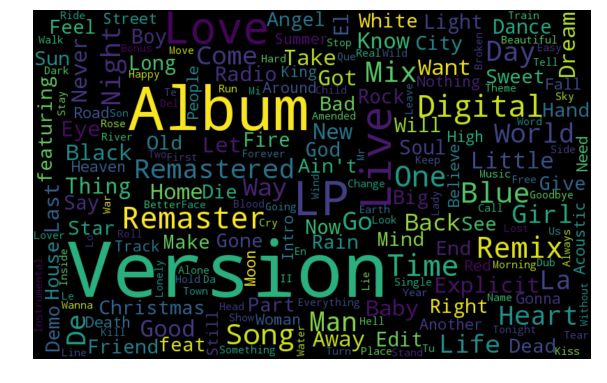

In [67]:
################  Word_cloud #######################################
all_words = ' '.join([text for text in df1['title']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [68]:
df_top = df_train.sort_values(by =['song_hotttnesss'],ascending= False)
df_top.head()

,song_id,artist_id,title,year,analysis_sample_rate,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,audio_md5,time_signature,time_signature_confidence,song_hotttnesss
21597,SONG_27751,ARTIST_351,Half Of My Heart,0,22050,250.38322,0.247,5,0.657,-9.273,1,0.546,231.137,115.132,1a396342ad2e9f8aace08625fae9f47a,4,0.000,1.0
10493,SONG_457014,ARTIST_14956,Same Old Lang Syne,1981,22050,319.86893,0.125,0,0.407,-9.280,1,0.651,307.844,107.504,8e05fa1d6c5fbd60edf7ce46c1fde54a,4,0.966,1.0
21268,SONG_46825,ARTIST_1253,A Great Big Sled,2006,22050,259.26485,0.369,0,0.637,-4.472,1,0.548,245.336,127.901,7fcc3cb1875744adc8f98f562194c521,4,0.000,1.0
813,SONG_580885,ARTIST_3527,Because The Night,1,22050,y,0.166,11,0.857,-6.506,0,0.877,174.811,122.602,3410db4f0dac4e2b1e67684254645535,4,0.762,1.0
20111,SONG_268674,ARTIST_9022,I Still Haven't Found What I'm Looking For,1987,22050,280.60689,3.796,1,0.844,-8.380,1,0.558,262.136,201.233,d13fd7ca6b77947115329060d05a708a,4,0.000,1.0


In [69]:
df_top1 = df_top.iloc[0:99,2] #################### top 100###############

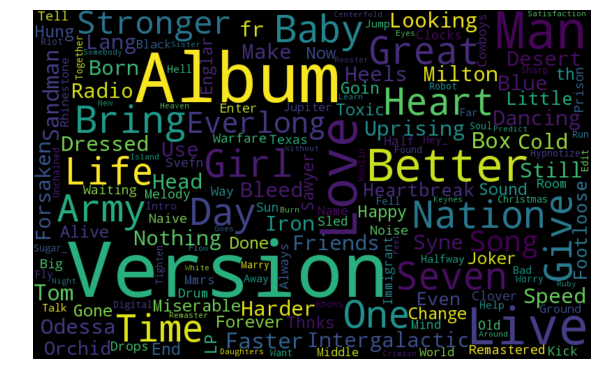

In [70]:
all_words = ' '.join([text for text in df_top1])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [71]:
# last 100

In [72]:
df_last = df_top.iloc[56120:56219,2]

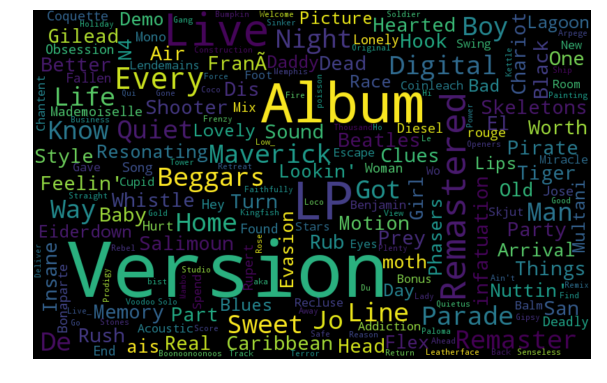

In [73]:
all_words = ' '.join([text for text in df_last])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,collocations = False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [67]:
###  features to include

In [68]:
vars_to_include=['key','loudness', 'mode','duration','key_confidence',
       'mode_confidence', 'song_hotttnesss','time_signature', 'time_signature_confidence',
                 'tempo','artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude', 'total_duration_full_volume','sentiment_score_of_titles']
       
X = df1[vars_to_include]

In [69]:
print(type(X))
print(X.shape)
X.info()

<class 'pandas.core.frame.DataFrame'>
(69334, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69334 entries, 0 to 69333
Data columns (total 16 columns):
key                           69334 non-null int64
loudness                      69334 non-null float64
mode                          69334 non-null int64
duration                      69334 non-null float64
key_confidence                69334 non-null object
mode_confidence               69334 non-null float64
song_hotttnesss               41709 non-null float64
time_signature                69334 non-null int64
time_signature_confidence     69334 non-null float64
tempo                         69334 non-null float64
artist_familiarity            69334 non-null float64
artist_hotttnesss             69334 non-null float64
artist_latitude               69334 non-null float64
artist_longitude              69334 non-null float64
total_duration_full_volume    69334 non-null float64
sentiment_score_of_titles     69334 non-null float64


In [70]:
#Changing data Types to float
X['key'] = X['key'].astype(float)
X['mode'] = X['mode'].astype(float)
X['time_signature'] = X['time_signature'].astype(float)
X['key_confidence'] = X['key_confidence'].astype(float)
X['duration'] = X['duration'].astype(float)



In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69334 entries, 0 to 69333
Data columns (total 16 columns):
key                           69334 non-null float64
loudness                      69334 non-null float64
mode                          69334 non-null float64
duration                      69334 non-null float64
key_confidence                69334 non-null float64
mode_confidence               69334 non-null float64
song_hotttnesss               41709 non-null float64
time_signature                69334 non-null float64
time_signature_confidence     69334 non-null float64
tempo                         69334 non-null float64
artist_familiarity            69334 non-null float64
artist_hotttnesss             69334 non-null float64
artist_latitude               69334 non-null float64
artist_longitude              69334 non-null float64
total_duration_full_volume    69334 non-null float64
sentiment_score_of_titles     69334 non-null float64
dtypes: float64(16)
memory usage: 8.5 MB


In [72]:
train_data= X[X.song_hotttnesss.notnull()]
print(train_data.shape)

test_data= X[~X.song_hotttnesss.notnull()]
print(test_data.shape)

(41709, 16)
(27625, 16)


In [73]:
test_data.pop('song_hotttnesss')

41709   NaN
41710   NaN
41711   NaN
41712   NaN
41713   NaN
         ..
69329   NaN
69330   NaN
69331   NaN
69332   NaN
69333   NaN
Name: song_hotttnesss, Length: 27625, dtype: float64

In [74]:
test_data.columns

Index(['key', 'loudness', 'mode', 'duration', 'key_confidence',
       'mode_confidence', 'time_signature', 'time_signature_confidence',
       'tempo', 'artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
       'artist_longitude', 'total_duration_full_volume',
       'sentiment_score_of_titles'],
      dtype='object')

In [75]:
print(test_data.shape)
print(type(test_data))

(27625, 15)
<class 'pandas.core.frame.DataFrame'>


In [76]:
train_data.columns

Index(['key', 'loudness', 'mode', 'duration', 'key_confidence',
       'mode_confidence', 'song_hotttnesss', 'time_signature',
       'time_signature_confidence', 'tempo', 'artist_familiarity',
       'artist_hotttnesss', 'artist_latitude', 'artist_longitude',
       'total_duration_full_volume', 'sentiment_score_of_titles'],
      dtype='object')

In [77]:
y = train_data['song_hotttnesss']
# drop target from predictiors vars
x = train_data.drop('song_hotttnesss',axis=1).values

In [78]:
X.columns

Index(['key', 'loudness', 'mode', 'duration', 'key_confidence',
       'mode_confidence', 'song_hotttnesss', 'time_signature',
       'time_signature_confidence', 'tempo', 'artist_familiarity',
       'artist_hotttnesss', 'artist_latitude', 'artist_longitude',
       'total_duration_full_volume', 'sentiment_score_of_titles'],
      dtype='object')

In [79]:
x.shape


(41709, 15)

In [80]:
y.shape

(41709,)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [82]:
#TRAIN_TEST_SPLIT
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=101)

# print shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(31281, 15) (31281,)
(10428, 15) (10428,)


In [83]:
#MODEL_USED
from sklearn.metrics import mean_absolute_error

In [84]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
lm.score(X_test, y_test)

0.1668268900477229

In [86]:
lm.score(X_train,y_train)

0.17593008096501972

In [87]:
len(y_test)

10428

In [88]:
test_data.head()

,key,loudness,mode,duration,key_confidence,mode_confidence,time_signature,time_signature_confidence,tempo,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,total_duration_full_volume,sentiment_score_of_titles
41709,6.0,-19.962,1.0,193.38404,0.000,0.000,4.0,0.665,117.370,0.675771,0.435469,35.47200,-97.52033,-179.889,-0.200
41710,7.0,-8.862,1.0,187.34975,0.579,0.611,4.0,0.112,136.153,0.739769,0.587336,0.00000,0.00000,-182.907,-0.400
41711,2.0,-4.562,0.0,284.26404,0.306,0.347,3.0,0.745,145.045,0.709011,0.553566,0.00000,0.00000,-277.269,0.000
41712,5.0,-8.229,1.0,410.82730,0.463,0.553,4.0,0.590,138.038,0.865022,0.916053,0.00000,0.00000,-408.079,0.136
41713,7.0,-6.168,1.0,133.48526,0.457,0.361,4.0,0.594,133.817,0.510993,0.379223,40.73197,-74.17418,-133.485,0.000


In [89]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
pred_test1 = lm.predict(test_data)

mae_train = metrics.mean_absolute_error(y_train, pred_train)
mae_test = metrics.mean_absolute_error(y_test ,pred_test)

In [90]:
len(pred_test1)

27625

In [91]:
# Mae for train and test data
print(mae_train)
print(mae_test)

0.1134167908833305
0.11432986734494312


In [114]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,max_depth=4)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [115]:
pred_train = model.predict(X_train)
pred_test2 = model.predict(X_test)

mae_train = metrics.mean_absolute_error(y_train,pred_train)
mae_test = metrics.mean_absolute_error(y_test,pred_test2)

In [116]:
print(mae_train)
print(mae_test)

0.11092379935641461
0.11182319733462581


In [92]:
#XGB 
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', subsample=0.8,colsample_bytree = 0.8, learning_rate = 0.05,
                max_depth = 5, n_estimators = 150) #alpha=1, lr=0.01, colsample=0.8,

In [93]:
xg_reg.fit(X_train,y_train)

[22:54:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [94]:
pred_train = xg_reg.predict(X_train)
pred_test = xg_reg.predict(X_test)

mae_train = metrics.mean_absolute_error(y_train,pred_train)
mae_test = metrics.mean_absolute_error(y_test,pred_test)

In [74]:
#print(mae_train)
#print(mae_test)

In [96]:
############ Hyperparameter tuning in XBG ################

In [97]:
from xgboost.sklearn import XGBRegressor

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
predictors=['key','loudness', 'mode','duration','key_confidence',
           'mode_confidence','time_signature', 'time_signature_confidence',
           'tempo','artist_familiarity', 'artist_hotttnesss', 'artist_latitude',
            'artist_longitude', 'total_duration_full_volume','sentiment_score_of_titles']
target=['song_hotttnesss']

In [100]:
# tuning max_depth and min_child_weight
param_test1 = {
 'max_depth':range(3,7,1),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.05, n_estimators=150,
  gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_absolute_error',n_jobs=4,iid=False, cv=3)

gsearch1.fit(train_data[predictors],train_data[target])

[22:57:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 7),
                         'min_child_weight': range(1, 6, 2)},
             

In [105]:
print(gsearch1.best_estimator_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=None, n_estimators=150,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.8, verbosity=1)
{'min_child_weight': 3, 'max_depth': 6}
-0.10174589471446072


In [103]:
[i/10.0 for i in range(0,5)]

[0.0, 0.1, 0.2, 0.3, 0.4]

In [104]:
# tuning gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.05, n_estimators=150, max_depth=6,
 min_child_weight=3, subsample=0.8, colsample_bytree=0.8
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='neg_mean_absolute_error',n_jobs=4,iid=False, cv=3)

gsearch2.fit(train_data[predictors],train_data[target])


[22:59:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=6,
                                    min_child_weight=3, missing=None,
                                    n_estimators=150, n_jobs=1, nthread=4,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [106]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.0}, -0.10174589471446072)

In [107]:
[i/10.0 for i in range(7,10)]

[0.7, 0.8, 0.9]

In [108]:
# tuning subsample and colsample_bytree
param_test3 = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.05, n_estimators=150, max_depth=6,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='neg_mean_absolute_error',n_jobs=4,iid=False, cv=3)

gsearch3.fit(train_data[predictors],train_data[target])
gsearch3.best_params_, gsearch3.best_score_

[23:02:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.7, 'subsample': 0.9}, -0.10149938343134561)

In [132]:
########### INcreasing n_estimators and decresing learning rate       ###########

In [ ]:
############# [lr=0.04 , n_estimator =250],[ lr=0.03 n_estimator=300,][ lr=0.03 n_es= [350,400][lr= 0.02,[400,450 500]], lr[0.02, [500,600, 650, 700]],lr[0.01, 700]

In [109]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', subsample=0.9,colsample_bytree = 0.7, learning_rate = 0.02,
                max_depth = 6,min_child_weight=3, n_estimators = 650)

In [161]:
################################################## finish tuning ################################

In [110]:
xg_reg.fit(X_train,y_train)

[23:02:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=None, n_estimators=650,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [111]:
pred_train = xg_reg.predict(X_train)
pred_test3 = xg_reg.predict(X_test)

mae_train = metrics.mean_absolute_error(y_train,pred_train)
mae_test = metrics.mean_absolute_error(y_test,pred_test3)

In [112]:
print(mae_train)
print(mae_test)

0.08995278885811664
0.09800804319542501


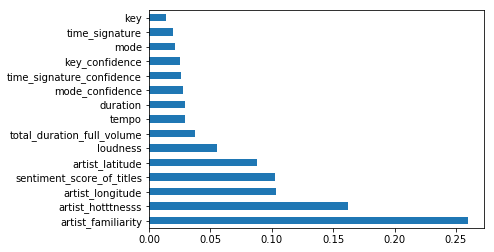

In [165]:
#FEATURE_IMPORTANCE
feat_importances = pd.Series(xg_reg.feature_importances_, index = test_data.columns).nlargest(15).plot(kind='barh')

In [166]:
len(pred_test3)

14055

In [167]:
######### Prediction on total data #################

In [168]:
#XGB 
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', subsample=0.9,colsample_bytree = 0.7, learning_rate = 0.02,
                max_depth = 6,min_child_weight=3, n_estimators = 650)

In [169]:
xg_reg.fit(x,y)

[02:41:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=650,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [170]:
pred_test_final = xg_reg.predict(test_data.as_matrix())

In [171]:
df_test.shape

(27625, 17)

In [172]:
# Creating final data frame 
df_output = pd.DataFrame({'a': df_test.song_id, 'b' : pred_test_final})
df_output.columns = ['song_id','song_hotttnesss']

In [173]:
df_output.head()

,song_id,song_hotttnesss
0,SONG_365464,0.423698
1,SONG_451710,0.564984
2,SONG_202731,0.611544
3,SONG_264595,0.615390
4,SONG_119114,0.390360


In [174]:
os.getcwd()

'C:\\Users\\Dell\\Downloads\\Data Set (Song Hotness) - extended'

In [175]:
# Writing Final output file to Csv
df_output.to_csv('out_xgb_tuning1.csv', sep = ',', index = False)